# Fusion des df-vélib et df_météo

In [1]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
### Céline
%cd C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas
### Hermine

### Tarik


C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas


In [2]:
# Import df_meteo
df_meteo = pd.read_csv('2018-2021_donnees-meteo.csv', index_col = 0)

# Import df_velib
df_velib = pd.read_csv('2018-2021_comptage-velo-donnees-compteurs.csv')
df_velib = df_velib.drop(['Unnamed: 0','Id_old', 'Address_old','Photo_old', 'Coord_old',  ], axis = 1)
df_velib = df_velib.rename({'Date_count':'Date'}, axis = 1)

In [3]:
# Merge df_velib et df_meteo
df = df_velib.merge(df_meteo, on = 'Date', how = 'outer')
df.tail(20)

,Id,Address,Count_by_hour,Date,Date_instal,Source,Direction,Latitude,Longitude,Coord,...,H_Date_Count,Y_Date_Instal,M_Date_Instal,D_Date_Instal,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo
1723875,100056047.0,PONT DE LA CONCORDE S-N,23.0,2021-05-29 23:00:00,2019-11-08 00:00:00,2021.0,S-N,48.864,2.320,"48.864,2.32",...,23.0,2019.0,11.0,8.0,17.9,0.0,49.0,0.0,4.4,Athis-Mons
1723876,100056332.0,PONT DE BERCY,11.0,2021-05-29 23:00:00,2019-12-11 00:00:00,2021.0,NE-SO,48.838,2.376,"48.838,2.376",...,23.0,2019.0,12.0,11.0,17.9,0.0,49.0,0.0,4.4,Athis-Mons
1723877,100056335.0,QUAI D'ORSAY,15.0,2021-05-29 23:00:00,2019-11-07 00:00:00,2021.0,O-E,48.863,2.312,"48.863,2.312",...,23.0,2019.0,11.0,7.0,17.9,0.0,49.0,0.0,4.4,Athis-Mons
1723878,100007049.0,28 BD DIDEROT,2.0,2021-05-29 23:00:00,2013-01-18 00:00:00,2021.0,E-O,48.846,2.375,"48.846,2.375",...,23.0,2013.0,1.0,18.0,17.9,0.0,49.0,0.0,4.4,Athis-Mons
1723879,NaN,NaN,NaN,2018-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,-0.1,98.0,0.0,1.8,Athis-Mons
1723880,NaN,NaN,NaN,2018-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,0.2,97.0,0.0,2.4,Athis-Mons
1723881,NaN,NaN,NaN,2018-12-31 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,-0.1,97.0,0.0,1.6,Athis-Mons
1723882,NaN,NaN,NaN,2018-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.9,0.2,98.0,0.0,0.9,Athis-Mons
1723883,NaN,NaN,NaN,2018-12-31 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.1,0.0,86.0,0.0,2.3,Athis-Mons
1723884,NaN,NaN,NaN,2018-12-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.2,0.0,82.0,0.0,1.9,Athis-Mons


In [4]:
# Comparer longueur du df créé avec df_velib
print('len de df_velib =', len(df_velib.index))
print('len de df =', len(df.index))

len de df_velib = 1723879
len de df = 1723895


<ipython-input-5-18c957e643ea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df_velib[df['M_Date_Count'] == 12]


<AxesSubplot:xlabel='D_Date_Count', ylabel='count'>

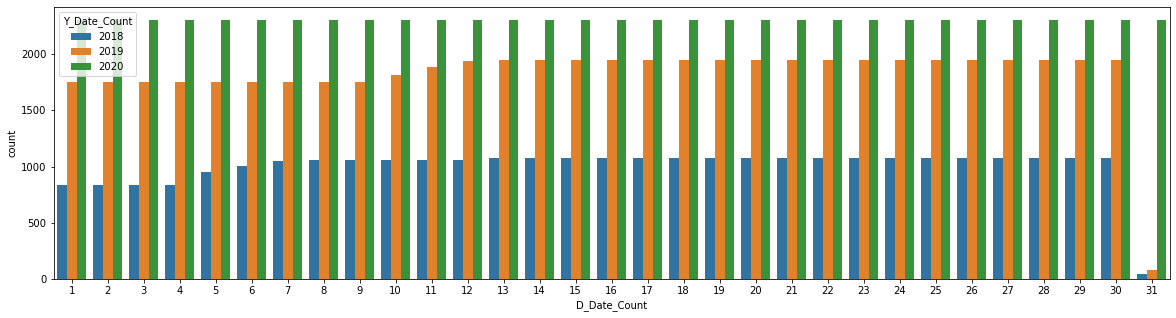

In [5]:
# Count plot sur df_velib pour vérifier que le count est fait tous les jours
df2 = df_velib[df['M_Date_Count'] == 12]
fig = plt.figure(figsize =(20,5))
sns.countplot(x =df2.D_Date_Count, hue = df2.Y_Date_Count )

**Observation:**
- La fusion a bien été réalisée, par contre il y a des NANs à cause du comptage météo toutes les 3 heures, il faudra trouver un moyen de remplacer ces NANs ou de faire une modélisation en utilisant un comptage toutes les 3 heures
- La longueur du df est plus long que le df_velib, cela s'observe par le fait qu'il n'y a pas de comptage vélo le 31 décembre 2018 et 2019, on peut donc supprimer ces lignes

In [6]:
# Suppression des dernières lignes contenant que des NANs sur les count-velo
df = df.iloc[0:1723879,:]

# Statistique

In [7]:
# Test de correlation sur les valeurs numériques et affichage des résultats sur la variable cible "Count_by_hour"
df2 = df.corr()
df2['ABS'] = abs(df2['Count_by_hour'])
df3 = df2[['Count_by_hour', 'ABS']]
df3.sort_values(by = 'ABS')

,Count_by_hour,ABS
Id,-0.000971,0.000971
D_Date_Count,0.003082,0.003082
High_ice,-0.016117,0.016117
D_Date_Instal,0.037759,0.037759
Precip_last3h,-0.039135,0.039135
M_Date_Instal,-0.039472,0.039472
M_Date_Count,0.048286,0.048286
Wind_speed_mean10mn,0.062798,0.062798
Longitude,0.063335,0.063335
Dweek_Date_Count,-0.080713,0.080713


Il est surprenant de voir que les p-values sont toutes basse <25%, de même les précipitations et hauteurs de glaces sont < 5% alors que l'on sait que c'est corrélé à la fréquentation des vélos... Peut-être est-ce lié au comptage horaire qu'il faudrait basculer en comptage/jour ?

In [8]:
df.describe()

,Id,Count_by_hour,Source,Latitude,Longitude,Y_Date_Count,M_Date_Count,D_Date_Count,Dweek_Date_Count,H_Date_Count,Y_Date_Instal,M_Date_Instal,D_Date_Instal,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn
count,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,1.723879e+06,573703.00000,572409.000000,573703.000000,559470.000000,573703.000000
mean,1.010572e+08,4.881506e+01,2.019764e+03,4.885555e+01,2.345685e+00,2.019764e+03,6.105776e+00,1.573197e+01,3.005441e+00,1.150150e+01,2.017584e+03,8.774947e+00,1.678905e+01,12.09635,0.212887,72.580497,0.000047,3.889254
std,1.419440e+07,7.478719e+01,8.739700e-01,2.051858e-02,3.789456e-02,8.739700e-01,3.566737e+00,8.756299e+00,1.996687e+00,6.921751e+00,2.183090e+00,3.767456e+00,9.242359e+00,7.16016,1.021174,18.747911,0.003218,2.132283
min,1.000031e+08,0.000000e+00,2.018000e+03,4.882000e+01,2.265000e+00,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,-8.40000,-0.100000,15.000000,-0.020000,0.000000
25%,1.000445e+08,4.000000e+00,2.019000e+03,4.884000e+01,2.314000e+00,2.019000e+03,3.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,2.018000e+03,7.000000e+00,8.000000e+00,7.00000,0.000000,59.000000,0.000000,2.300000
50%,1.000475e+08,2.100000e+01,2.020000e+03,4.885400e+01,2.354000e+00,2.020000e+03,5.000000e+00,1.600000e+01,3.000000e+00,1.200000e+01,2.018000e+03,1.100000e+01,1.500000e+01,11.20000,0.000000,77.000000,0.000000,3.600000
75%,1.000562e+08,6.200000e+01,2.020000e+03,4.887000e+01,2.375000e+00,2.020000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.800000e+01,2.019000e+03,1.100000e+01,2.700000e+01,16.70000,0.000000,88.000000,0.000000,5.300000
max,3.000147e+08,2.088000e+03,2.021000e+03,4.889700e+01,2.410000e+00,2.021000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,2.020000e+03,1.200000e+01,3.000000e+01,41.40000,56.200000,100.000000,0.150000,13.900000


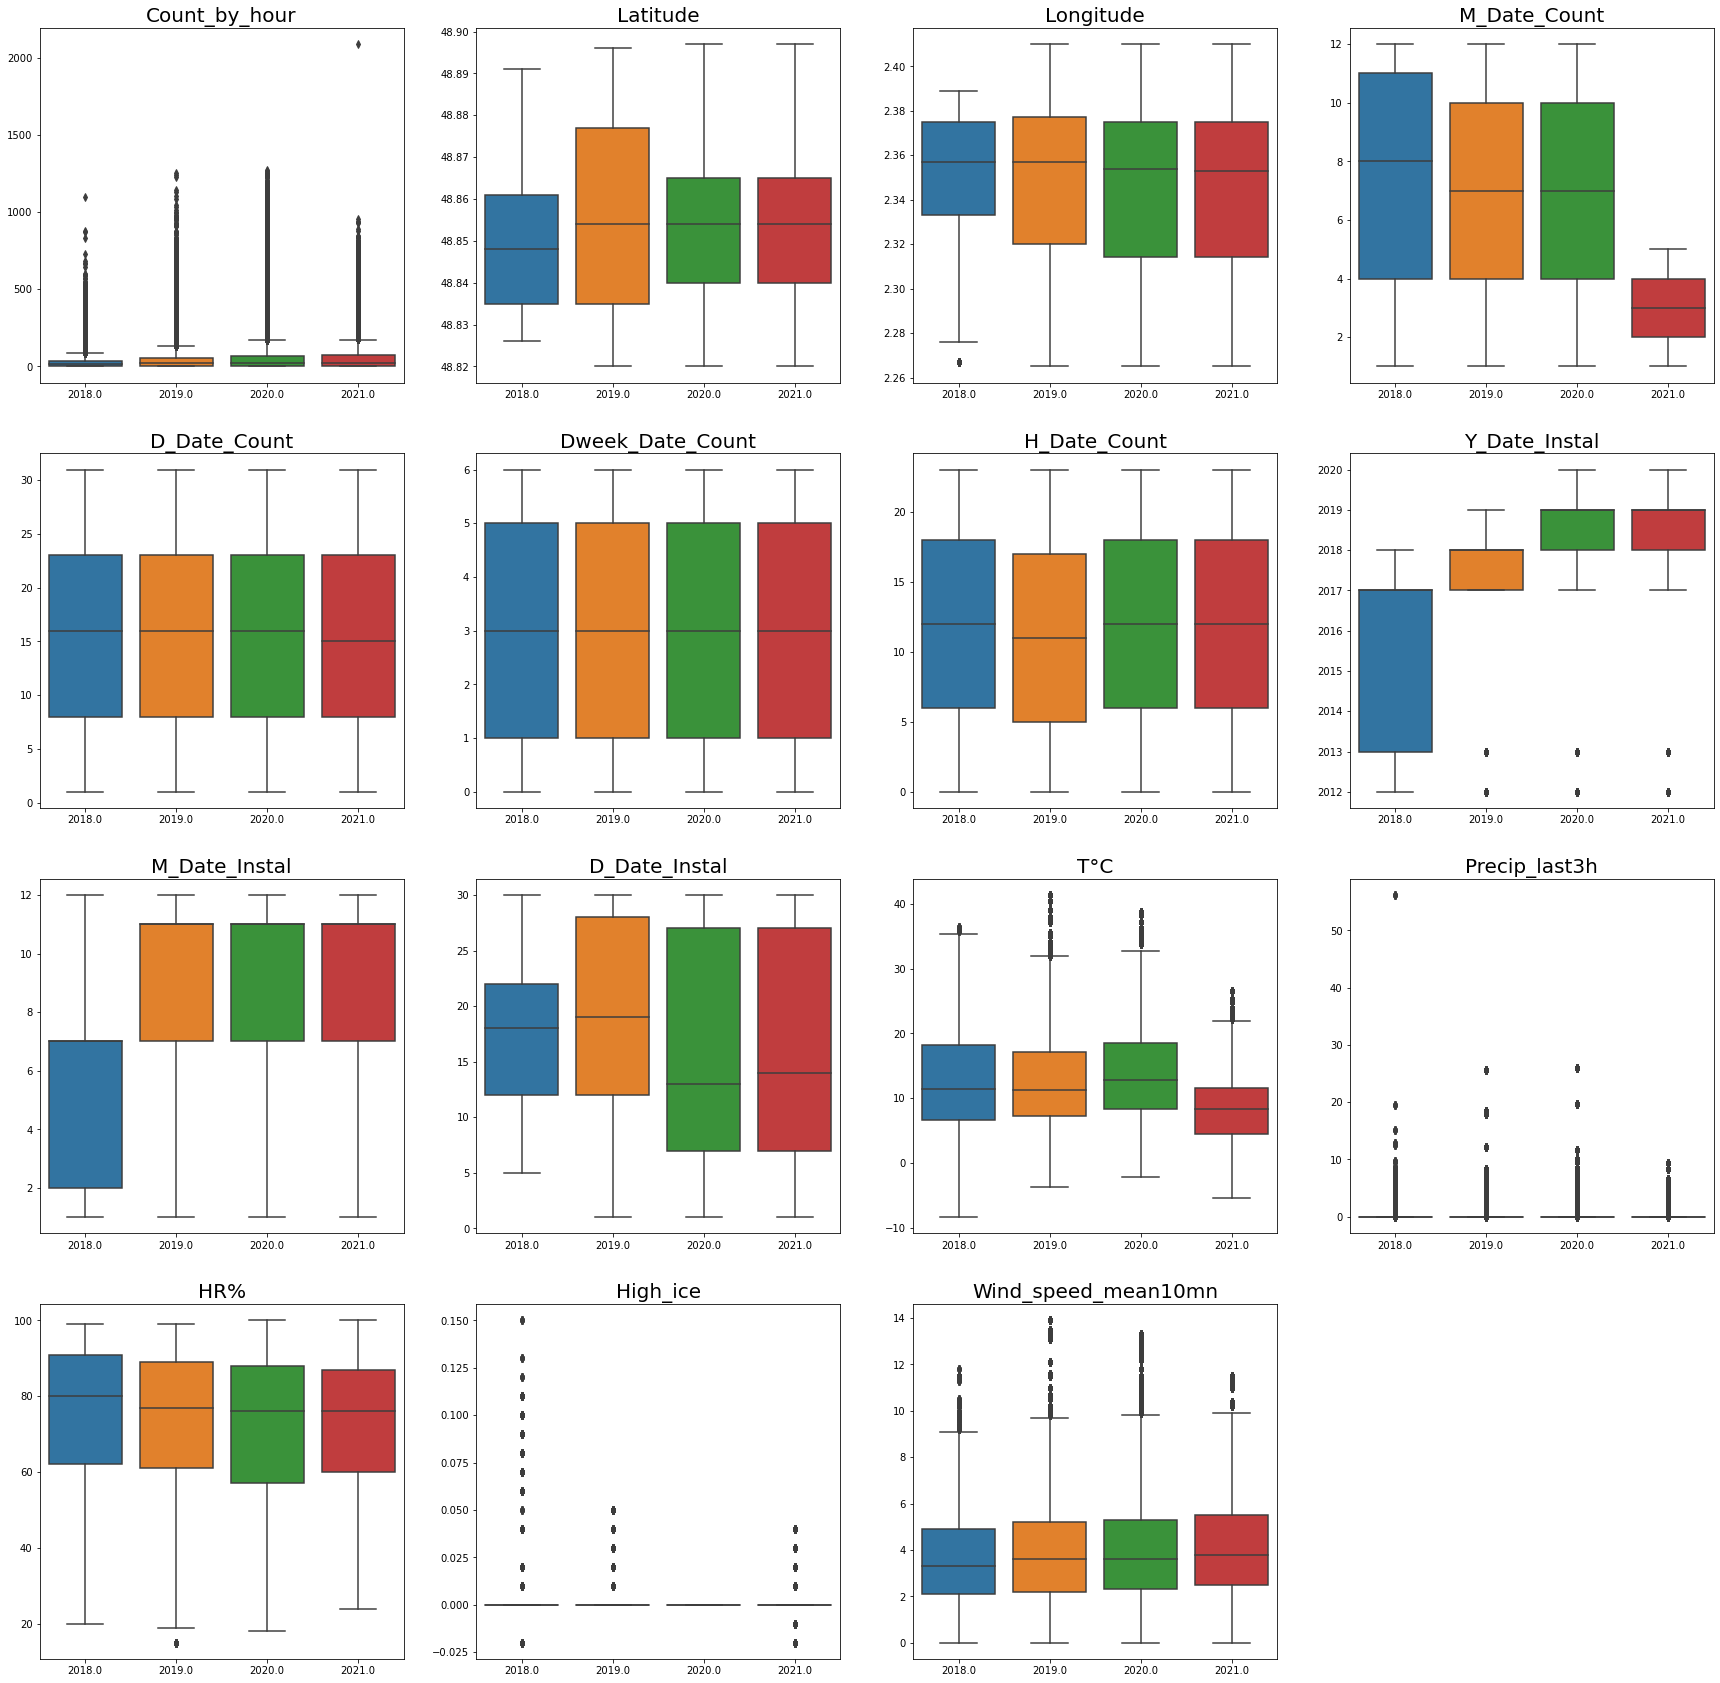

In [9]:
# Boxplot pour visualiser les valeurs de describe ci-dessus:
Liste_col = ['Count_by_hour', 'Latitude', 'Longitude',
             'M_Date_Count', 'D_Date_Count', 'Dweek_Date_Count', 'H_Date_Count',
             'Y_Date_Instal', 'M_Date_Instal', 'D_Date_Instal',
             'T°C', 'Precip_last3h', 'HR%', 'High_ice','Wind_speed_mean10mn']

fig = plt.figure(figsize = (30,30))
for i, j in enumerate(Liste_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = df, y = j, x = 'Y_Date_Count')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(j, size = 20)

**Observations**:
- Count_by_hour: valeur aberrante > 2000
- M_Date_Count: pour 2021 est plus bas mais c'est normal n'ayant que jusqu'à mai
- Y_Date_Instal: beaucoup de nouveaux compteurs sont installés chaque année, les compteurs avant 2017 ont tous été supprimé sauf ceux de 2012 et 2013, à vérifier la fiabilité de ces compteurs étant vieux
- Precip_last3h: Valeur aberrante > 50
- Pour les 3 colonnes (High_ice, Precip_last3h, Count_by_hour) la majorité des valeurs sont à 0, il est préférable de faire un boxplot sur les valeurs différentes de 0 pour plus de précision et vérifier qu'il n'y a pas de valeurs négatives

In [10]:
# Supression des 2 valeurs aberrantes:
df = df[df['Count_by_hour'] < 2000]
df = df[df['Precip_last3h'] < 50]

nombre de données High_ice <0: 3060
nombre de données Precip_last3h <0: 54745
nombre de données Count_by_hour <0: 0


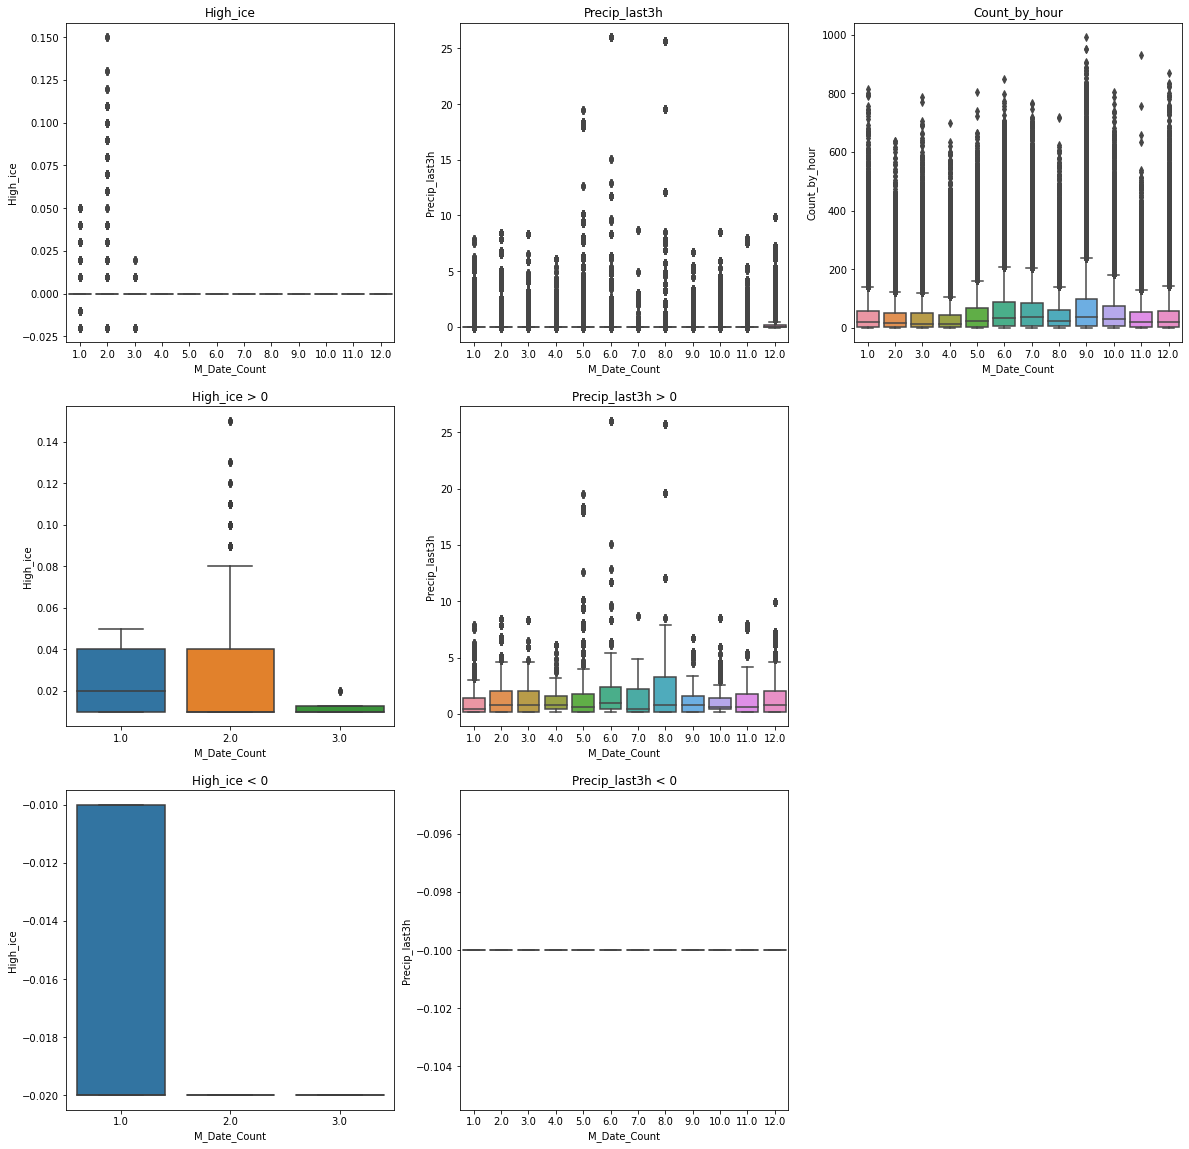

In [11]:
# Observations des boxplots des 3 colonnes
fig = plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice')
print('nombre de données High_ice <0:', len(df[df['High_ice'] < 0]))
plt.subplot(3,3,4)
df1 = df[df['High_ice'] > 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice > 0')
plt.subplot(3,3,7)
df1 = df[df['High_ice'] < 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice < 0')

plt.subplot(3,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h')
print('nombre de données Precip_last3h <0:', len(df[df['Precip_last3h'] < 0]))
plt.subplot(3,3,5)
df2 = df[df['Precip_last3h'] > 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h > 0')
plt.subplot(3,3,8)
df2 = df[df['Precip_last3h'] < 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h < 0')

plt.subplot(3,3,3)
sns.boxplot(data = df, y = 'Count_by_hour', x = 'M_Date_Count');
plt.title('Count_by_hour')
print('nombre de données Count_by_hour <0:', len(df[df['Count_by_hour'] < 0]))

**Observations:**
- High_ice: Il neige que de janvier à mars, les valeurs négatives sont des erreurs, pas facile de savoir si c'est à remplacer par 0 ou par la valeur abs ?
- Precip_last3h: Il pleut toute l'année, les valeurs négatives à -0.1 sont des erreurs (à remplacer par 0 ou par valeur abs ?)

Je fais le choix de remplacer les valeurs négatives par leur absolues

<AxesSubplot:xlabel='M_Date_Count', ylabel='Precip_last3h'>

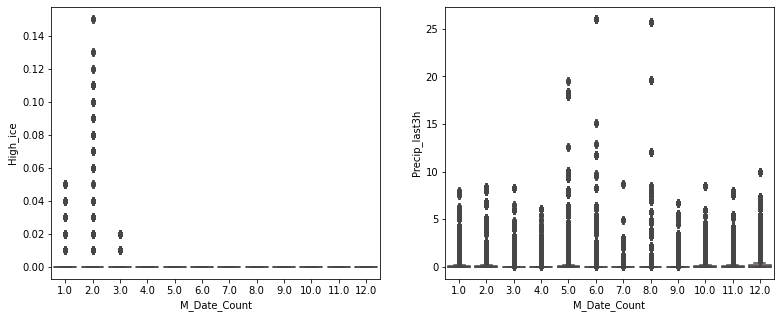

In [12]:
# Remplacement des valeurs négatives par positive:
df['High_ice'] = abs(df['High_ice'])
df['Precip_last3h'] = abs(df['Precip_last3h'])

# Affichage des boxplot
fig = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')

In [13]:
df = df.sort_values(by = 'Date')
df.index = range(len(df.index))
df.head()

,Id,Address,Count_by_hour,Date,Date_instal,Source,Direction,Latitude,Longitude,Coord,...,H_Date_Count,Y_Date_Instal,M_Date_Instal,D_Date_Instal,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo
0,100036719.0,18 QUAI DE L'HOTEL DE VILLE,2.0,2018-01-01 01:00:00,2017-07-12 00:00:00,2018.0,NO-SE,48.854,2.357,"48.854,2.357",...,1.0,2017.0,7.0,12.0,8.4,0.0,72.0,0.0,7.0,Athis-Mons
1,100036719.0,18 QUAI DE L'HOTEL DE VILLE,2.0,2018-01-01 01:00:00,2017-07-12 00:00:00,2018.0,SE-NO,48.854,2.357,"48.854,2.357",...,1.0,2017.0,7.0,12.0,8.4,0.0,72.0,0.0,7.0,Athis-Mons
2,100003096.0,97 AV DENFERT ROCHEREAU SO-NE,3.0,2018-01-01 01:00:00,2012-02-22 00:00:00,2018.0,SO-NE,48.835,2.333,"48.835,2.333",...,1.0,2012.0,2.0,22.0,8.4,0.0,72.0,0.0,7.0,Athis-Mons
3,100006300.0,135 AV DAUMESNIL SE-NO,1.0,2018-01-01 01:00:00,2013-01-19 00:00:00,2018.0,SE-NO,48.843,2.383,"48.843,2.383",...,1.0,2013.0,1.0,19.0,8.4,0.0,72.0,0.0,7.0,Athis-Mons
4,100003098.0,106 AV DENFERT ROCHEREAU NE-SO,2.0,2018-01-01 01:00:00,2012-02-22 00:00:00,2018.0,NE-SO,48.835,2.333,"48.835,2.333",...,1.0,2012.0,2.0,22.0,8.4,0.0,72.0,0.0,7.0,Athis-Mons


In [14]:
# Enregister le nouveau df sous format csv
df.to_csv('2018-2021_donnees-velib-meteo.csv')